### Importing libraris and dataset

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis, pearsonr, f_oneway, chi2_contingency
from statsmodels.stats.power import TTestPower
import statsmodels.api as sm
from tabulate import tabulate

In [10]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Times New Roman'

Throughout this notebook, we will be working with the diamonds dataset.

In [11]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds = diamonds.drop(columns=['Unnamed: 0'])
diamonds

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


&nbsp;

### 1. Descriptive Statistics

This subsection provides brief informational coefficients that summarize __'Carat'__ in diamonds dataset. Descriptive statistics are broken down into measures of central tendency and measures of variability (spread).

In [12]:
print('descriptive statistics for physical weight of diamonds'.title())
print('Mean:',np.mean(diamonds['carat']))
print('Median:',np.median(diamonds['carat']))
print('Mode:',stats.mode(diamonds['carat'])[0])
print('Standard Deviation:',np.std(diamonds['carat']))
print('Skewness:',skew(diamonds['carat']))
print('Kurtosis:',kurtosis(diamonds['carat']))

Descriptive Statistics For Physical Weight Of Diamonds
Mean: 0.7979397478680014
Median: 0.7
Mode: 0.3
Standard Deviation: 0.47400685050996644
Skewness: 1.1166148681277797
Kurtosis: 1.2564076184374766


&nbsp;

### 2. Confidence Interval

To obtain the confidence interval we need to know the sampling distribution of the estimate.

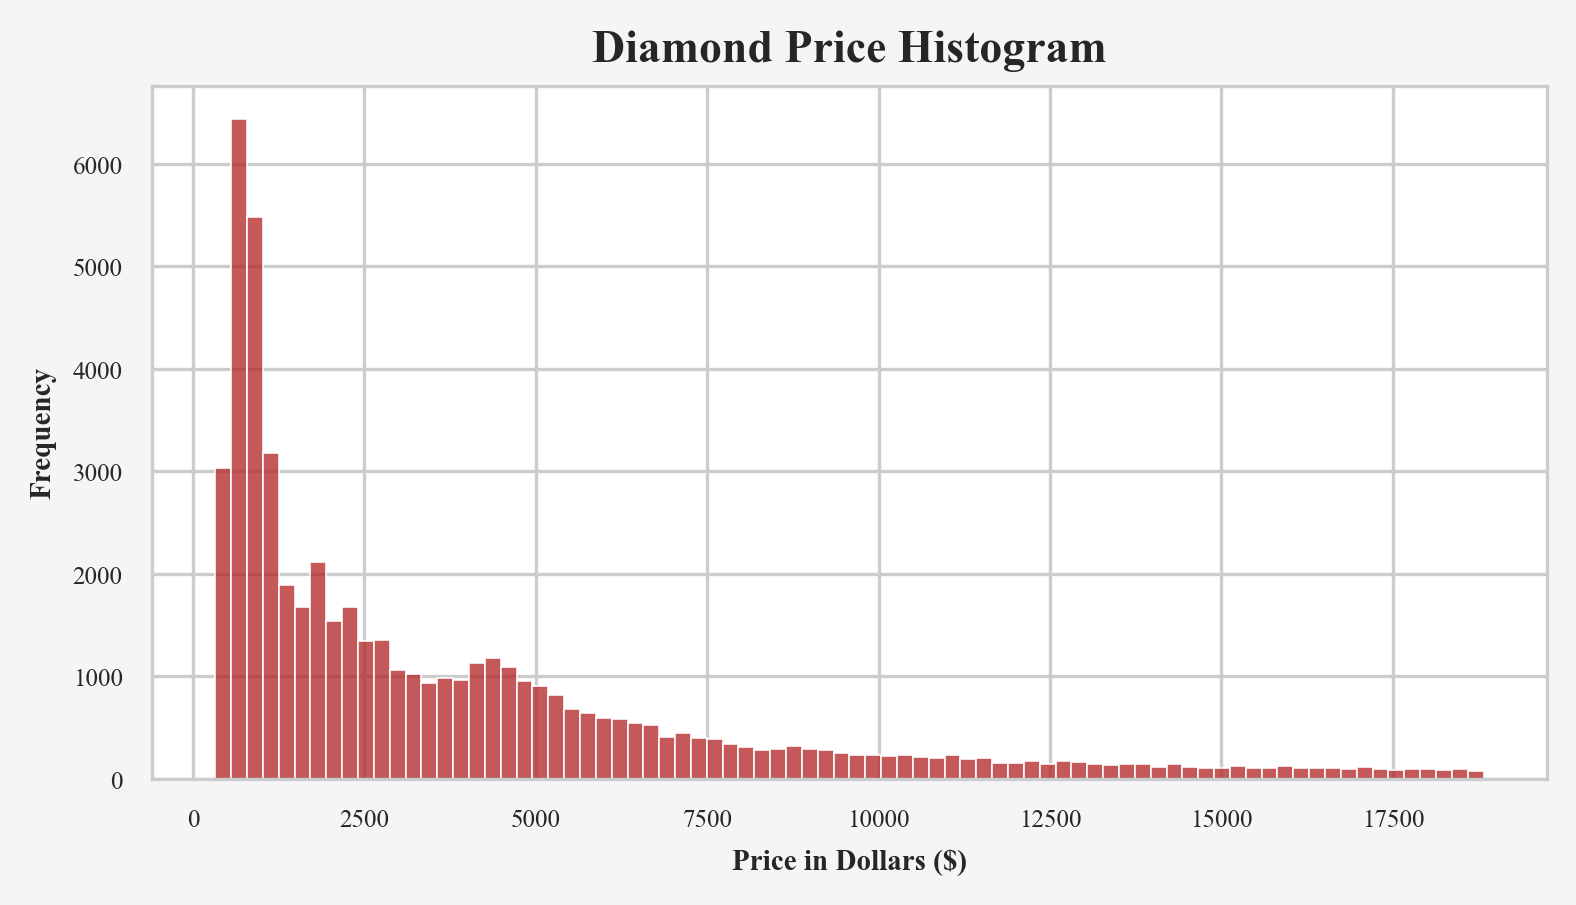

In [13]:
plt.figure(facecolor='whitesmoke', figsize=(6, 3), dpi=300)
plt.title('Diamond Price Histogram', fontweight='bold', fontsize=11)
ax = sns.histplot(diamonds['price'], color='firebrick')
plt.ylabel('Frequency', fontweight='bold', fontsize=7)
plt.xlabel('Price in Dollars ($)', fontweight='bold', fontsize=7)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6);

Now that we know the diamond price follows a exponential distribution, we can calculate the 95% confidence Intervals using the _'expon.interval()'_ function.

In [14]:
ci_result = stats.expon.interval(confidence=.95,loc=np.mean(diamonds['price']),scale=stats.sem(diamonds['price']))
print(f'We can be 95% confident that the range of {ci_result} contains the true mean of the population.')

We can be 95% confident that the range of (3933.2346150360427, 3996.164935301714) contains the true mean of the population.


&nbsp;

### 3. One Sample T-Test

First, we need to check whether the _'Depth'_ of the diamonds __approximately follows a normal distribution__ and is __independent__ or not.

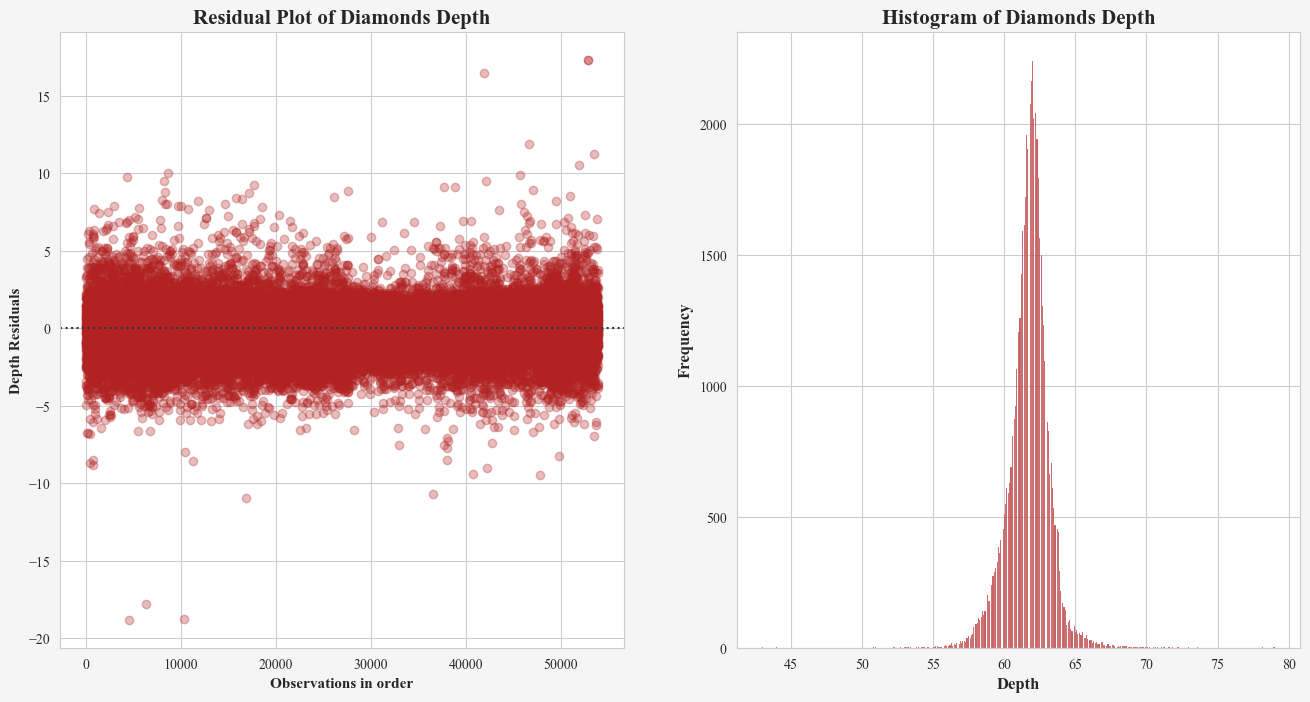

In [15]:
fig, ax = plt.subplots(1,2, figsize=(16,8), facecolor='whitesmoke')

sns.residplot(x=diamonds.index, y=diamonds['depth'],
              color='firebrick', scatter_kws={'alpha':0.3}, ax=ax[0])

sns.histplot(diamonds['depth'], color='firebrick', ax=ax[1])

ax[0].set_title('Residual Plot of Diamonds Depth', fontweight='bold', fontsize=15)
ax[1].set_title('Histogram of Diamonds Depth', fontweight='bold', fontsize=15)
ax[0].set_ylabel('Depth Residuals', fontweight='bold', fontsize=11)
ax[0].set_xlabel('Observations in order', fontweight='bold', fontsize=11)
ax[1].set_ylabel('Frequency', fontweight='bold', fontsize=12)
ax[1].set_xlabel('Depth', fontweight='bold', fontsize=12);

The one-sample t-test is a statistical hypothesis test that can be used to see if the mean of an unknown population differs from a given or known value.

\begin{gather*}
H_0: \text{the  mean  of  'depth'  is  60}\\
H_1: \text{the mean of 'depth' is not 60}
\end{gather*}

In [16]:
t_statistic, p_value = stats.ttest_1samp(diamonds['depth'], popmean=60)
print('P-Value:', p_value)
print('T-Statistics:', t_statistic)

P-Value: 0.0
T-Statistics: 283.60533657979755


P-value is less than 0.05 (which is the alpha value) so we would reject the null hypothesis (significant result).

&nbsp;

### 4. Impact Of Sample And Effect Size On Power + OC Curve

A common way to calculate effect size is to find Cohen’s d term. d is calculated by taking the difference in means of two samples divided by the standard deviations of the samples. Cohen determined d values of 0.2, 0.5, and 0.8 to denote small, medium, and large effect sizes, respectively.

In [17]:
power_analysis = TTestPower()
effect_size = [.2, .5, .8] #Cohen's d term
sample_size = [10, 25, 50]
power = []

for effect in effect_size:
    power_lst = []
    for size in sample_size:
        calculated_power = '%.3f' % power_analysis.solve_power(effect_size=effect, nobs=size, alpha=.05)
        power_lst.append(calculated_power)
    power.append(power_lst)

power = np.array(power)
power = np.hstack(([['small (0.2)'], ['medium (0.5)'], ['large (0.8)']],power))
print(tabulate(power, headers=[f'n={size}' for size in sample_size], tablefmt='fancy_grid'))

╒══════════════╤════════╤════════╤════════╕
│              │   n=10 │   n=25 │   n=50 │
╞══════════════╪════════╪════════╪════════╡
│ small (0.2)  │  0.088 │  0.161 │  0.284 │
├──────────────┼────────┼────────┼────────┤
│ medium (0.5) │  0.293 │  0.67  │  0.934 │
├──────────────┼────────┼────────┼────────┤
│ large (0.8)  │  0.616 │  0.97  │  1     │
╘══════════════╧════════╧════════╧════════╛


As we can see increasing effect size and/or sample size increase the power.

A graph known as an __Operating-Characteristic Curve__ can be constructed to show how changes in the sample size affect the probability of making a type II error. First, we need to define a function to calculate beta.

In [18]:
def calculate_beta(l, n, k):
    beta = stats.norm.cdf(l - k*np.sqrt(n)) - stats.norm.cdf(-l - k*np.sqrt(n))
    return beta

In [19]:
k = np.linspace(0,5,100)
oc_data_n10 = pd.DataFrame({'k':k})
oc_data_n25 = pd.DataFrame({'k':k})
oc_data_n50 = pd.DataFrame({'k':k})
oc_data_n10['beta'] = calculate_beta(3,10,oc_data_n10['k'])
oc_data_n25['beta'] = calculate_beta(3,25,oc_data_n10['k'])
oc_data_n50['beta'] = calculate_beta(3,50,oc_data_n10['k'])

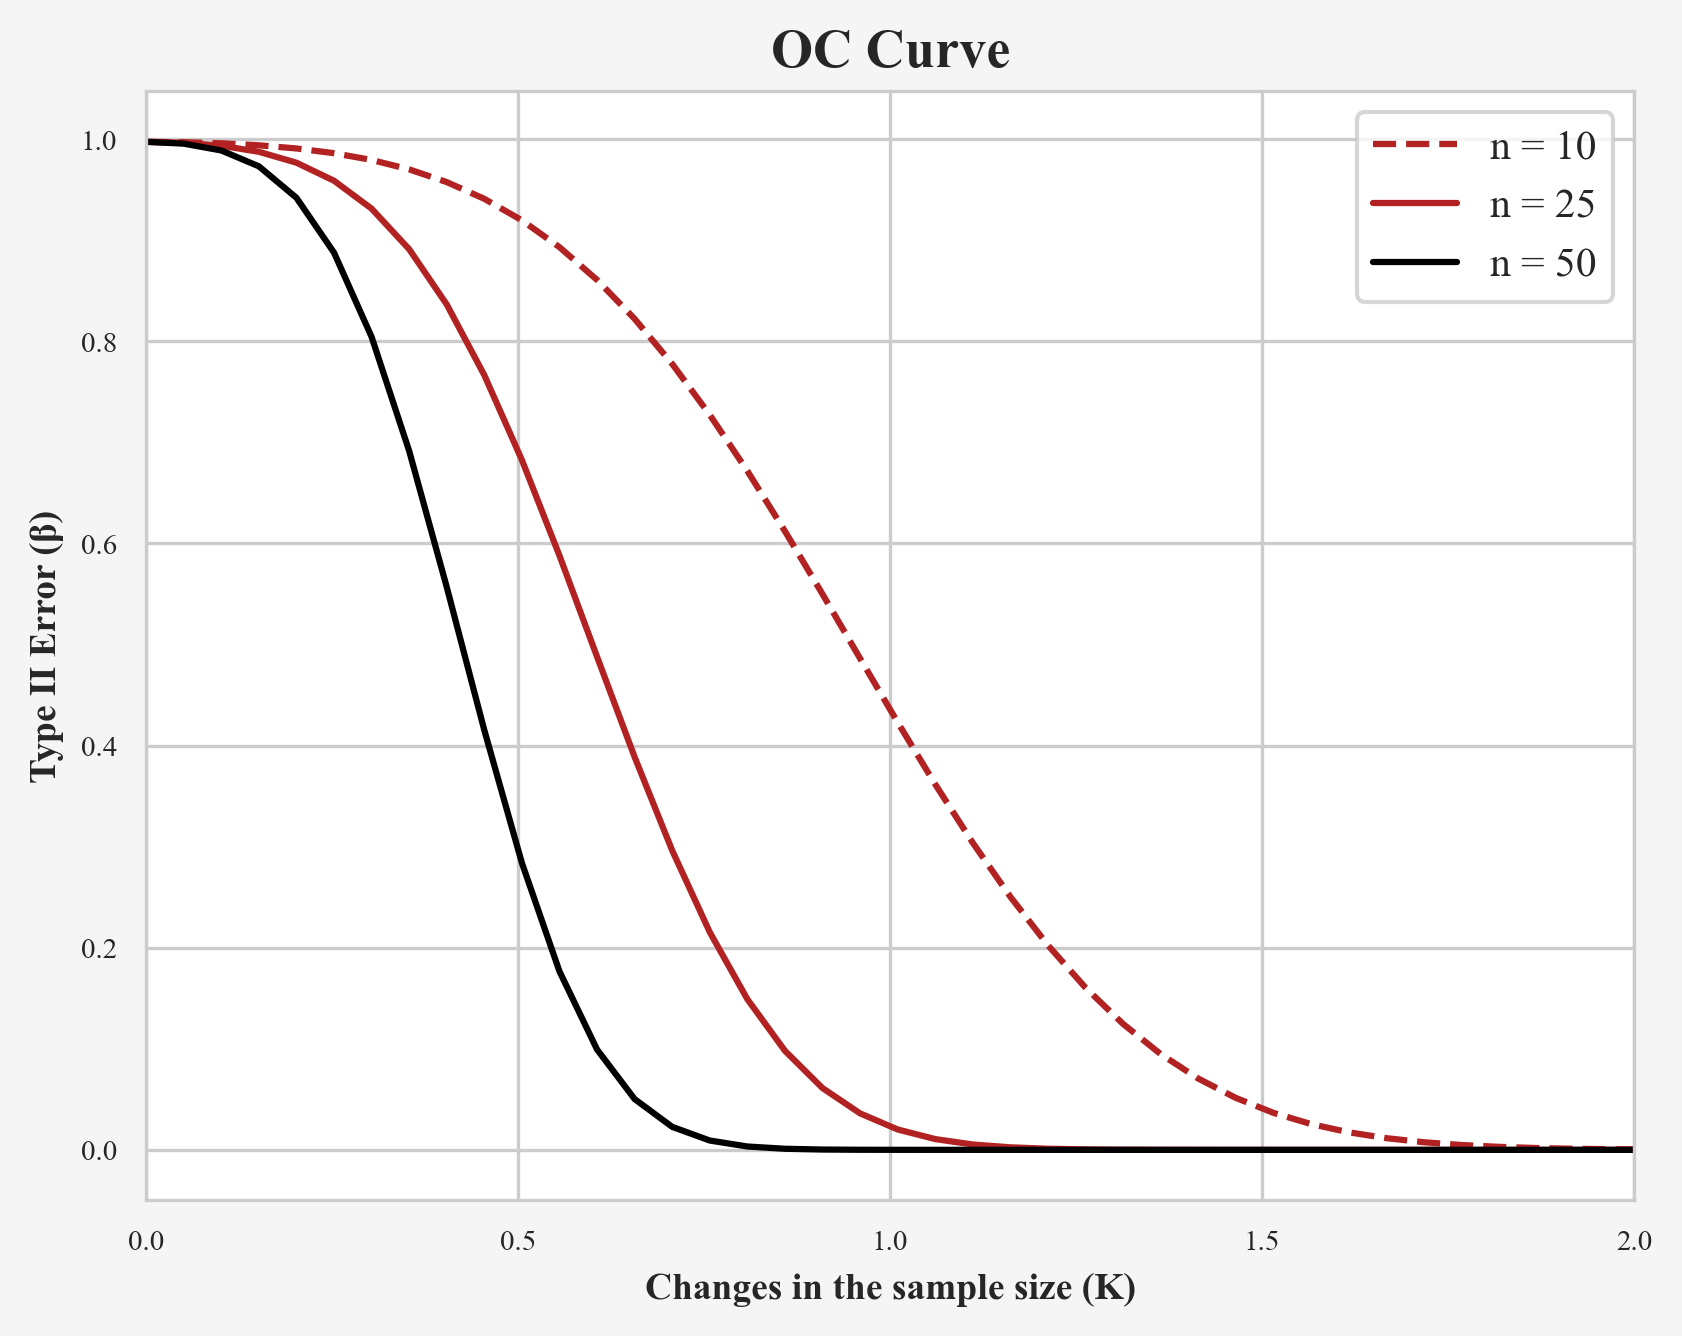

In [20]:
plt.figure(facecolor='whitesmoke', dpi=300)
plt.title('OC Curve', fontweight='bold', fontsize=13)
sns.lineplot(data=oc_data_n10, x='k', y='beta', label='n = 10', color='firebrick', linestyle='--')
sns.lineplot(data=oc_data_n25, x='k', y='beta', label='n = 25', color='firebrick')
sns.lineplot(data=oc_data_n50, x='k', y='beta', label='n = 50', color='black')
plt.xticks(np.linspace(0,2,5), fontsize=7)
plt.yticks(fontsize=7)
plt.xlim([0,2])
plt.ylabel('Type II Error (β)', fontweight='bold', fontsize=9)
plt.xlabel('Changes in the sample size (K)', fontweight='bold', fontsize=9)
plt.legend();

&nbsp;

### 5. Pearson Correlation Test

The strength of the association between two variables is known as correlation test.
The equation below shows the formula for calculating Pearson’s correlation coefficient:

\begin{gather*}
r = \frac{\Sigma{(x-m_x)(y-m_y)}}{\sqrt{\Sigma(x-m_x)^2\Sigma(y-m_y)^2}}\\
\end{gather*}

\begin{gather*}
\text{x and y are two vectors of length n}\\
m_x\text{ and }m_y\text{ corresponds to the means of x and y, respectively.}
\end{gather*}

In [21]:
corr,_ = pearsonr(diamonds['price'], diamonds['carat'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.922


As is shown, there is a strong relationship between the two variables of __'Price'__ and __'Carat'__

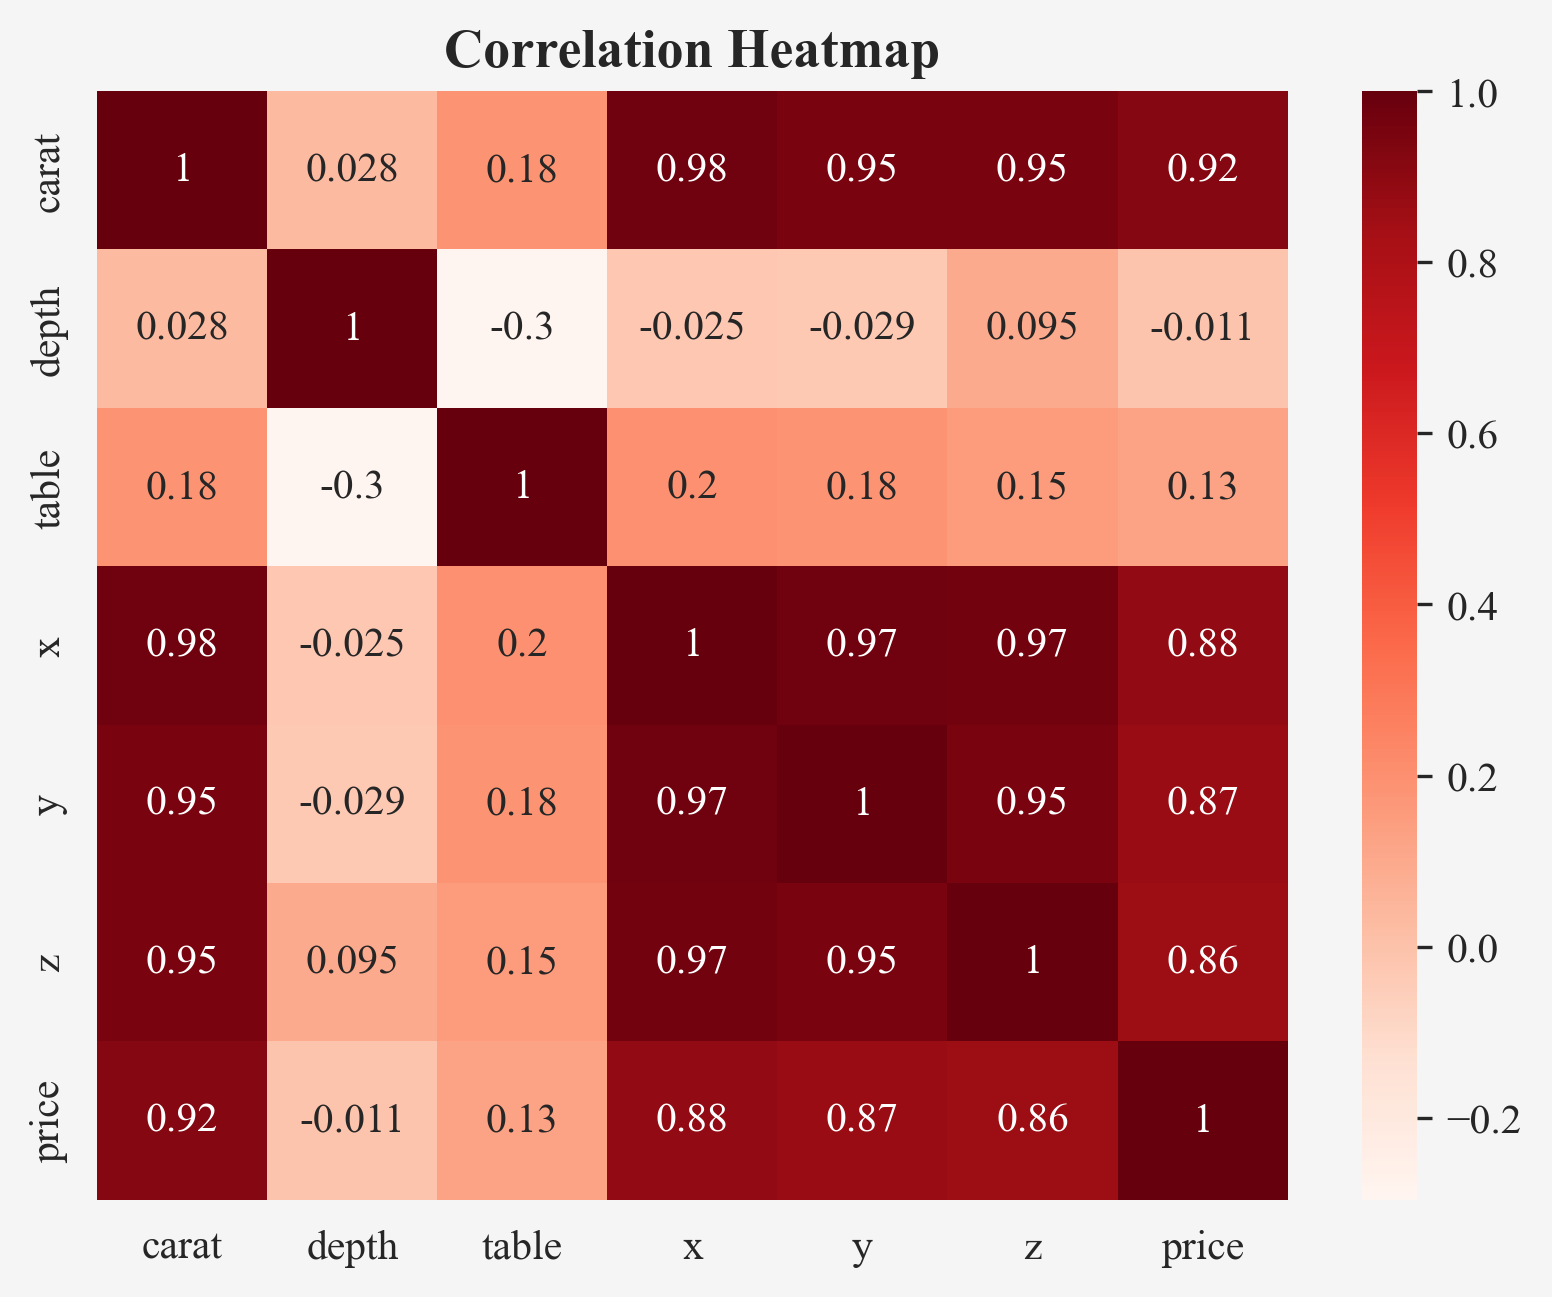

In [22]:
cols_to_plot = ['carat','depth','table','x','y','z','price']
plt.figure(facecolor='whitesmoke', dpi=300)
plt.title('Correlation Heatmap', fontweight='bold', fontsize=13)
sns.heatmap(diamonds[cols_to_plot].corr(), cmap="Reds", annot=True);

&nbsp;

### 6. One-Way ANOVA

In [23]:
ideal = diamonds.loc[diamonds['cut']=='Ideal', 'price']
premium = diamonds.loc[diamonds['cut']=='Premium', 'price']
good = diamonds.loc[diamonds['cut']=='Good', 'price']
very_good = diamonds.loc[diamonds['cut']=='Very Good', 'price']
fair = diamonds.loc[diamonds['cut']=='Fair', 'price']

A one-way ANOVA has the below given null and alternative hypotheses:

\begin{gather*}
H_0: μ_1 = μ_2 = μ_3 = … = μ_k \text{ (It implies that the means of all the population are equal)}\\
H_1: \text{It states that there will be at least one population mean that differs from the rest}
\end{gather*}

In [24]:
_,p_value = f_oneway(ideal, premium, good, very_good, fair)
print('P-Value: %.3f' % p_value)

P-Value: 0.000


Since the p-value is less than 0.05 hence we would reject the null hypothesis.

This implies that we have sufficient proof to say that there exists a difference in the mean of __'Price'__ for different cuts.

&nbsp;

### 7. Chi-Square Test of Independence of Variables in a Contingency Table

this test is primarily used to examine whether two categorical variables (two dimensions of the contingency table) are independent in influencing the test statistic (values within the table).

\begin{gather*}
H_0: \text{each diamond's cut is independant of its color classification}\\
H_1: \text{each diamond's cut is dependant on its color classification}
\end{gather*}

In [25]:
cut_color_tab = pd.crosstab(diamonds['cut'], diamonds['color'])
cut_color_tab

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


In [26]:
fair = np.array(cut_color_tab.loc['Fair'])
good = np.array(cut_color_tab.loc['Good'])
ideal = np.array(cut_color_tab.loc['Ideal'])
premium = np.array(cut_color_tab.loc['Premium'])
very_good = np.array(cut_color_tab.loc['Very Good'])

In [27]:
cut_color_arr = np.array([fair, good, ideal, premium, very_good])

In [28]:
chi2_stat,chi2_pval,chi2_dof,_ = chi2_contingency(cut_color_arr)
print('Chi2 P-Value: %.3f' % chi2_pval)
print('Chi2 Statistic: %.3f' % chi2_stat)
print('Chi2 Degrees of Freedom:', chi2_dof)

Chi2 P-Value: 0.000
Chi2 Statistic: 310.318
Chi2 Degrees of Freedom: 24


Using a significance level of 5%, we would reject the null hypothesis in favor of the alternative hypothesis.

&nbsp;

### 8. Kruskal-Wallis Test

In [29]:
si2 = diamonds.loc[diamonds['clarity']=='SI2', 'depth']
si1 = diamonds.loc[diamonds['clarity']=='SI1', 'depth']
vs1 = diamonds.loc[diamonds['clarity']=='VS1', 'depth']
vs2 = diamonds.loc[diamonds['clarity']=='VS2', 'depth']
vvs2 = diamonds.loc[diamonds['clarity']=='VVS2', 'depth']
vvs1 = diamonds.loc[diamonds['clarity']=='VVS1', 'depth']
i1 = diamonds.loc[diamonds['clarity']=='I1', 'depth']
iff = diamonds.loc[diamonds['clarity']=='IF', 'depth']

The Kruskal-Wallis Test has the null and alternative hypotheses as discussed below:

\begin{gather*}
H_0: \text{The median of 'Depth' is the same for all 'Clarity' groups.}\\
H_1: \text{The median of 'Depth' is not equal for all 'Clarity' groups.}
\end{gather*}

In [30]:
_,krus_pval = stats.kruskal(si2,si1,vs1,vs2,vvs2,vvs1,i1,iff)
print('Kruskal P-Value: %.3f' % krus_pval)

Kruskal P-Value: 0.000


as the p-value is less than 0.05, we would reject the null hypothesis that the median __'Depth'__ of diamonds is the same for all __'Clarity'__ groups.

&nbsp;

### 9. One Sample T-Test + Power Analysis

First, we need to conduct a one sample t-test for mean of diamonds __'Price'__.

\begin{gather*}
H_0: \text{The mean of 'Price' is 4000.}\\
H_1: \text{The mean of 'Price' is not 4000.}
\end{gather*}

In [31]:
_,p_value = stats.ttest_1samp(diamonds['price'], popmean=4000)
print('One Sample T-Test P-Value %.3f' % p_value)

One Sample T-Test P-Value 0.000


since p-value is less than 0.05, the null hypothesis is rejected.

In [32]:
power_analysis = TTestPower()
sample_size = [100, 200, 500]
effect_size = [.2, .5, .8]

for (n,effect) in zip(sample_size, effect_size):
    pow = power_analysis.solve_power(effect_size=effect, nobs=n, alpha=.05, power=None)
    print(f'Sample Size = {n}, Effect Size = {effect} => Calculated Power = {pow}')

Sample Size = 100, Effect Size = 0.2 => Calculated Power = 0.5082648038718826
Sample Size = 200, Effect Size = 0.5 => Calculated Power = 1.0
Sample Size = 500, Effect Size = 0.8 => Calculated Power = 1.0


&nbsp;

### 10. Estimating Population Distribution Parameters with Method of Moments (MoM)

The _'scipy.stats'_ module in Python provides several functions and distributions that are used to fit the specified data on different distributions. The _'fit()'_ function is employed to estimate/evaluate the parameters of a probability distribution based on the given set of data.

In [34]:
carat_mu, carat_sigma = stats.norm.fit(data=diamonds['carat'], method='MM')
print('Estimated Mean:',carat_mu)
print('Estimated Standard Deviation:',carat_sigma)

Estimated Mean: 0.7979397478680014
Estimated Standard Deviation: 0.47400685050996644
